In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') #경고표시 없애기 
#warnings.filterwarnings(action = 'default') #경고표시 

In [37]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
exam= iris[['sepal_length','sepal_width','petal_length','petal_width']]
exam.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
target = iris['species']
target[:2]

0    setosa
1    setosa
Name: species, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
#훈련 문제, 연습 문제, 훈련 답, 검증 답
#X_train, X_test, y_train, y_test 
train_exam, test_exam, train_target, test_target= train_test_split(exam,#문제
                                                                  target,#답
                                                                   test_size = 0.2, #검증비율 20% 훈련비율 80%
                                                                   random_state =42#seed
                                                                  )

In [23]:
train_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 102
Data columns (total 4 columns):
sepal_length    120 non-null float64
sepal_width     120 non-null float64
petal_length    120 non-null float64
petal_width     120 non-null float64
dtypes: float64(4)
memory usage: 4.7 KB


In [24]:
train_target.count()

120

In [25]:
test_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 73 to 30
Data columns (total 4 columns):
sepal_length    30 non-null float64
sepal_width     30 non-null float64
petal_length    30 non-null float64
petal_width     30 non-null float64
dtypes: float64(4)
memory usage: 1.2 KB


In [26]:
test_target.count()

30

In [27]:
train_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [28]:
train_exam.reset_index(inplace=True)

In [35]:
train_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.6,1.0,0.2
1,5.7,4.4,1.5,0.4
2,6.7,3.1,4.4,1.4
3,4.8,3.4,1.6,0.2
4,4.4,3.2,1.3,0.2


In [30]:
del train_exam['index']

In [34]:
train_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.6,1.0,0.2
1,5.7,4.4,1.5,0.4
2,6.7,3.1,4.4,1.4
3,4.8,3.4,1.6,0.2
4,4.4,3.2,1.3,0.2


In [33]:
test_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [38]:
test_exam.reset_index(inplace=True)

In [40]:
test_exam.head()

,index,sepal_length,sepal_width,petal_length,petal_width
0,73,6.1,2.8,4.7,1.2
1,18,5.7,3.8,1.7,0.3
2,118,7.7,2.6,6.9,2.3
3,78,6.0,2.9,4.5,1.5
4,76,6.8,2.8,4.8,1.4


In [41]:
del test_exam['index']

In [42]:
test_exam.head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,2.8,4.7,1.2
1,5.7,3.8,1.7,0.3
2,7.7,2.6,6.9,2.3
3,6.0,2.9,4.5,1.5
4,6.8,2.8,4.8,1.4


In [46]:
train_target = train_target.reset_index()
train_target[:5]

,index,species
0,22,setosa
1,15,setosa
2,65,versicolor
3,11,setosa
4,42,setosa


In [47]:
del train_target['index']

In [50]:
train_target.head()

,species
0,setosa
1,setosa
2,versicolor
3,setosa
4,setosa


In [52]:
test_target[:5]

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

In [55]:
test_target =test_target.reset_index()
test_target[:5]

,index,species
0,73,versicolor
1,18,setosa
2,118,virginica
3,78,versicolor
4,76,versicolor


In [56]:
del test_target['index']

In [58]:
test_target.head()

,species
0,versicolor
1,setosa
2,virginica
3,versicolor
4,versicolor


In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
tree_clf.fit(train_exam, train_target) #많이 공부 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [62]:
tree_clf.score(train_exam, train_target) #많이 공부한 것에 대한 점수 
                                         #train data에 대한 정확도(어큐러시)

0.9583333333333334

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
com_target = tree_clf.predict(test_exam) #모의고사를 풀어보자 
com_target[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [65]:
accuracy_score(test_target, com_target)

1.0

In [66]:
train_exam.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [80]:
#  def flo_pre(x):
#     if x ==0:
#         print('setosa')
#     elif x==1:
#         print('veriscolor')
#     elif x==2:
#         print('virginica')
#unique순으로 했을 때 정렬된 순서대로 0,1,2
#array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [81]:
flower1 = [2.3,1.9,4.2,3.0]

In [90]:
result1 = tree_clf.predict_proba([flower1])

In [92]:
flower2 = [1.1,2.2,3.3,4.4]
result2 = tree_clf.predict_proba([flower2])
result2


array([[0., 0., 1.]])

In [84]:
print(tree_clf.feature_importances_)

[0.         0.         0.93462632 0.06537368]


In [85]:
x =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = tree_clf.feature_importances_

In [86]:
result_df = pd.DataFrame({'feature':x,'weight':y})

In [87]:
result_df

,feature,weight
0,sepal_length,0.000000
1,sepal_width,0.000000
2,petal_length,0.934626
3,petal_width,0.065374


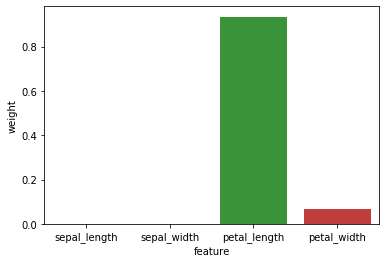

In [88]:
sns.barplot('feature','weight', data=result_df)